<a href="https://colab.research.google.com/github/SEivani/Github_Tutorial/blob/main/Down%20Sampling-%20Automatoes-.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
weather = pd.read_csv("Weather.csv")

1. Production

In [4]:
prod = pd.read_csv("Production.csv")
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   %time                     23 non-null     int64  
 1   ProdA                     23 non-null     float64
 2   ProdB                     23 non-null     float64
 3   avg_nr_harvested_trusses  23 non-null     float64
 4   Truss development time    23 non-null     int64  
 5   Nr_fruits_ClassA          22 non-null     float64
 6   Weight_fruits_ClassA      23 non-null     float64
 7   Nr_fruits_ClassB          23 non-null     int64  
 8   Weight_fruits_ClassB      23 non-null     int64  
dtypes: float64(5), int64(4)
memory usage: 1.7 KB


changing the time format

In [5]:
prod.rename(columns={"%time": "Time"}, inplace=True)
prod['Time'] = pd.to_datetime(prod['Time'], unit='D', origin='1899-12-30')

In [6]:
#Data augmentation
tm = np.arange(np.datetime64("2019-12-16"), np.datetime64("2020-05-30"), np.timedelta64(1, "D")).astype('datetime64[ns]')
df0 = pd.DataFrame({'Time': tm})
df0

,Time
0,2019-12-16
1,2019-12-17
2,2019-12-18
3,2019-12-19
4,2019-12-20
...,...
161,2020-05-25
162,2020-05-26
163,2020-05-27
164,2020-05-28


In [9]:
df0 = df0.merge(prod, how="left")
df0.head()

,Time,ProdA,ProdB,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA,Nr_fruits_ClassB,Weight_fruits_ClassB
0,2019-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the dataset it can be observed the following:

The first time points are all with missing values, indicating no records, so it's better to drop them, it's true there is a value for February 2019, but the whole seasonal fluctuation is missing, so it will be dropped.
ProdB and its columns are almost empty, it is also said that the ProdA is preffered over ProdB. So the columns can be dropped.
For the missing values, a cubic spline interpolation technique will be used.

In [13]:
# Deleting the outlier

for ind, yr in enumerate(df0.Time.dt.year):
  if yr == 2019:
    df0.drop(ind, axis=0, inplace=True)

# Deleting the ProdB related columns

del_cols = []
for cols in df0.columns:
  if "B" in cols:
    del_cols.append(cols)

df0.drop(columns=del_cols, inplace=True)
df0.set_index("Time", inplace=True)

In [15]:
df0[df0.columns] = df0[df0.columns].interpolate(method="cubicspline")
df0.dropna(inplace=True)
df0

,ProdA,avg_nr_harvested_trusses,Truss development time,Nr_fruits_ClassA,Weight_fruits_ClassA
Time,,,,,
2020-02-24,0.970000,1.000000,55.000000,158.000000,1343.000000
2020-02-25,0.813715,0.953768,54.514292,132.689210,1284.721194
2020-02-26,0.638372,0.901787,53.911121,124.537411,1224.270006
2020-02-27,0.483843,0.873913,53.352389,129.866907,1201.183815
2020-02-28,0.390000,0.900000,53.000000,145.000000,1255.000000
...,...,...,...,...,...
2020-05-25,0.766460,0.949415,40.949653,85.151867,830.167123
2020-05-26,0.640000,0.800000,41.000000,60.000000,613.000000
2020-05-27,0.594379,0.746916,40.922908,54.587730,572.789302


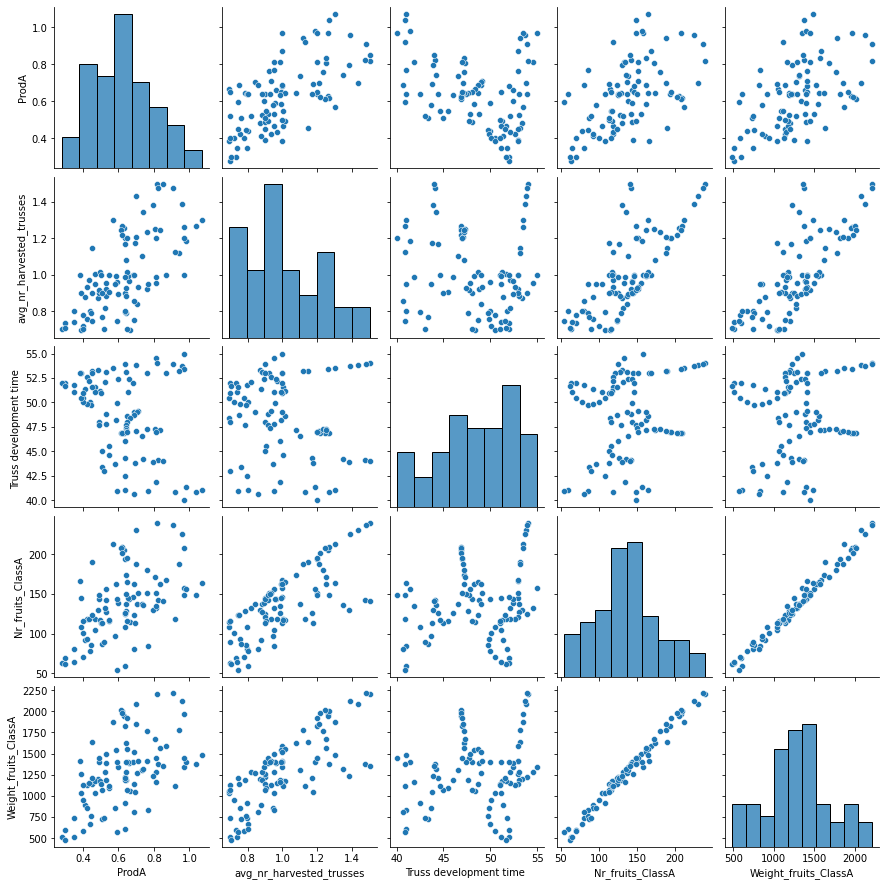

In [16]:
sns.pairplot(df0)

In [17]:
filt = df0.index

2- Greenhouse Climate

In [19]:
gh = pd.read_csv("GreenhouseClimate.csv")
gh.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   %time                        47809 non-null  float64
 1   AssimLight                   47809 non-null  object 
 2   BlackScr                     47809 non-null  object 
 3   CO2air                       47809 non-null  object 
 4   Cum_irr                      47809 non-null  object 
 5   EC_drain_PC                  47809 non-null  object 
 6   EnScr                        47809 non-null  object 
 7   HumDef                       47809 non-null  object 
 8   PipeGrow                     47809 non-null  object 
 9   PipeLow                      47809 non-null  object 
 10  Rhair                        47809 non-null  object 
 11  Tair                         47809 non-null  object 
 12  Tot_PAR                      47809 non-null  object 
 13  Tot_PAR_Lamps   

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [20]:
gh.rename(columns={"%time": "Time"}, inplace=True)
gh['Time'] = pd.to_datetime(gh['Time'], unit='D', origin='1899-12-30')

In [25]:
sp_cols = []
vip_cols = []
indoor_cols = []

for col in gh.columns:
  if col == "Time":
    indoor_cols.append(col)
  
  else:
    gh[col] = gh[col].astype(float)

    if "_sp" in col:
        sp_cols.append(col)
    elif "_vip" in col:
        vip_cols.append(col)
    else:
        indoor_cols.append(col)

indoor_df = gh.loc[:, indoor_cols]
sp_df = gh.loc[:, sp_cols] # won´t be used, same data in vip and more realistic, realized sp
vip_df = gh.loc[:, vip_cols] # too many Nan values that can't be replaced
vip_df.info

<bound method DataFrame.info of        assim_vip  co2_vip  dx_vip  int_blue_vip  int_farred_vip  int_red_vip  \
0            0.0    400.0     2.2           NaN             NaN          NaN   
1            0.0    400.0     2.2           NaN             NaN          NaN   
2            0.0    400.0     2.2           NaN             NaN          NaN   
3            0.0    400.0     2.2           NaN             NaN          NaN   
4            0.0    400.0     2.2           NaN             NaN          NaN   
...          ...      ...     ...           ...             ...          ...   
47804        0.0    300.0     2.2           NaN             NaN          NaN   
47805        0.0    300.0     2.2           NaN             NaN          NaN   
47806        0.0    300.0     2.2           NaN             NaN          NaN   
47807        0.0    300.0     2.2           NaN             NaN          NaN   
47808        NaN      NaN     NaN           NaN             NaN          NaN   

       

In [26]:
sp_df.info

<bound method DataFrame.info of        assim_sp  co2_sp  dx_sp  int_blue_sp  int_farred_sp  int_red_sp  \
0           NaN     NaN    NaN          NaN            NaN         NaN   
1           NaN     NaN    NaN          0.0            0.0       700.0   
2           NaN     NaN    NaN          0.0            0.0       700.0   
3           NaN     NaN    NaN          0.0            0.0       700.0   
4           NaN     NaN    NaN          0.0            0.0       700.0   
...         ...     ...    ...          ...            ...         ...   
47804       NaN   300.0    2.2       1000.0            0.0      1000.0   
47805       NaN   300.0    2.2       1000.0            0.0      1000.0   
47806       NaN   300.0    2.2       1000.0            0.0      1000.0   
47807       NaN   300.0    2.2       1000.0            0.0      1000.0   
47808       NaN     NaN    NaN       1000.0            0.0      1000.0   

       int_white_sp  scr_blck_sp  scr_enrg_sp  t_grow_min_sp  t_heat_sp  \
0   

In [27]:
indoor_df.info

<bound method DataFrame.info of                                Time  AssimLight  BlackScr  CO2air  Cum_irr  \
0     2019-12-16 00:00:00.000000000         0.0      35.0   468.0      0.3   
1     2019-12-16 00:04:59.808000256         0.0      85.0   509.0      0.5   
2     2019-12-16 00:09:59.616000000         0.0      96.0   498.0      0.5   
3     2019-12-16 00:15:00.288000000         0.0      96.0   491.0      0.5   
4     2019-12-16 00:20:00.096000256         0.0      95.0   515.0      0.5   
...                             ...         ...       ...     ...      ...   
47804 2020-05-29 23:39:59.903999744         0.0       0.0   493.0      2.9   
47805 2020-05-29 23:44:59.712000000         0.0       0.0   493.0      2.9   
47806 2020-05-29 23:50:00.384000000         0.0       0.0   485.0      2.9   
47807 2020-05-29 23:55:00.191999744         0.0       0.0   502.0      2.9   
47808 2020-05-30 00:00:00.000000000         NaN       NaN     NaN      NaN   

       EC_drain_PC  EnScr  HumD

In [28]:
# Grouping by day, and taking the mean as central value for each day
df1 = indoor_df.groupby(pd.Grouper(key='Time', axis=0, freq='D')).mean()
df1.info

<bound method DataFrame.info of             AssimLight   BlackScr      CO2air   Cum_irr  EC_drain_PC  \
Time                                                                   
2019-12-16   42.708333  36.638889  549.979167  0.042708     1.773958   
2019-12-17   45.138889   0.000000  634.343750  0.000000     1.800000   
2019-12-18   75.694444  36.434028  643.642361  0.000000     1.800000   
2019-12-19   75.694444  36.434028  600.149306  0.000000     1.800000   
2019-12-20   79.166667  45.326389  668.958333  0.170139     1.748264   
...                ...        ...         ...       ...          ...   
2020-05-26    0.000000  34.565972  522.934028  1.723264     7.717708   
2020-05-27    0.000000  34.871528  507.628472  1.728472     8.238542   
2020-05-28    0.000000  35.972222  507.194444  1.728125     8.625347   
2020-05-29    0.000000  23.100694  500.250000  1.730208     7.795833   
2020-05-30         NaN        NaN         NaN       NaN          NaN   

                EnScr     HumDe

In [29]:
cols = df1.columns
inds = df1.index
imputer = KNNImputer(n_neighbors=2) # KNN imputer is used to replace missing values, best aproach !!

data = imputer.fit_transform(df1)
df1 = pd.DataFrame(data=data, columns=cols, index=inds)

In [31]:
# Filtering out the dataset with only the dates of production
df1 = df1.loc[filt,:]
df1["ProdA"] = df0.ProdA
df1.columns

Index(['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC', 'EnScr',
       'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup', 'ProdA'],
      dtype='object')

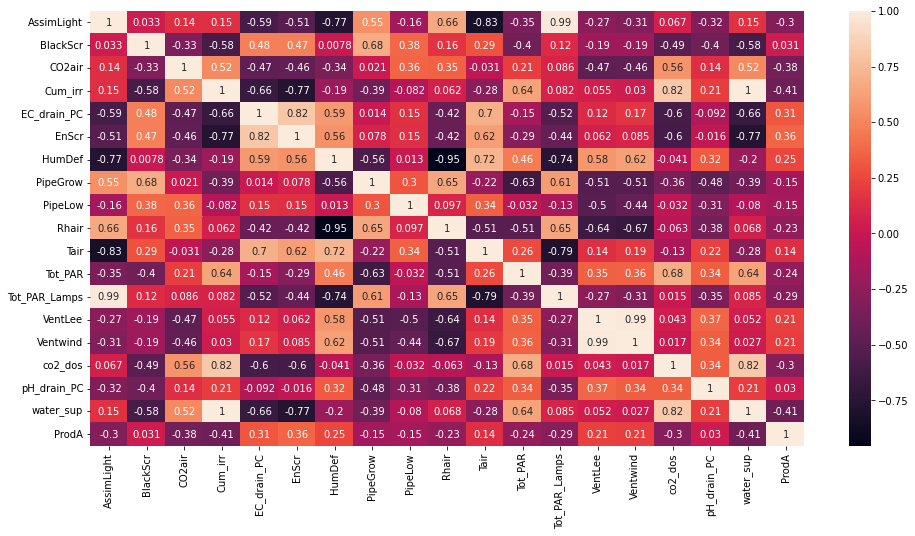

In [32]:
# Getting correlations of greenhouse data set with ProdA
plt.figure(figsize=(16,8))
sns.heatmap(df1.corr(), annot=True)

df1.corr()["ProdA"].sort_values()
df1.drop(columns="ProdA", inplace=True)

3-Gordan Sensors

In [33]:
grodan = pd.read_csv("GrodanSens.csv")
grodan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   %time     47809 non-null  float64
 1   EC_slab1  47809 non-null  object 
 2   EC_slab2  47809 non-null  object 
 3   WC_slab1  47809 non-null  object 
 4   WC_slab2  47809 non-null  object 
 5   t_slab1   47809 non-null  object 
 6   t_slab2   47809 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [34]:
grodan.rename(columns={"%time": "Time"}, inplace=True)
grodan['Time'] = pd.to_datetime(grodan['Time'], unit='D', origin='1899-12-30')

In [38]:
for col in grodan.columns:
  if col == "Time":
    pass
  else:
    grodan[col] = grodan[col].astype(float)
grodan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      47809 non-null  datetime64[ns]
 1   EC_slab1  45483 non-null  float64       
 2   EC_slab2  45483 non-null  float64       
 3   WC_slab1  45483 non-null  float64       
 4   WC_slab2  45483 non-null  float64       
 5   t_slab1   45483 non-null  float64       
 6   t_slab2   45483 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 2.6 MB


In [39]:
df2 = grodan.groupby(pd.Grouper(key='Time', axis=0, freq='D')).mean()

In [40]:
cols = df2.columns
inds = df2.index
imputer = KNNImputer(n_neighbors=2)

In [41]:
data = imputer.fit_transform(df2)
df2 = pd.DataFrame(data=data, columns=cols, index=inds)

In [42]:
df2 = df2.loc[filt,:]
df2["ProdA"] = df0.ProdA

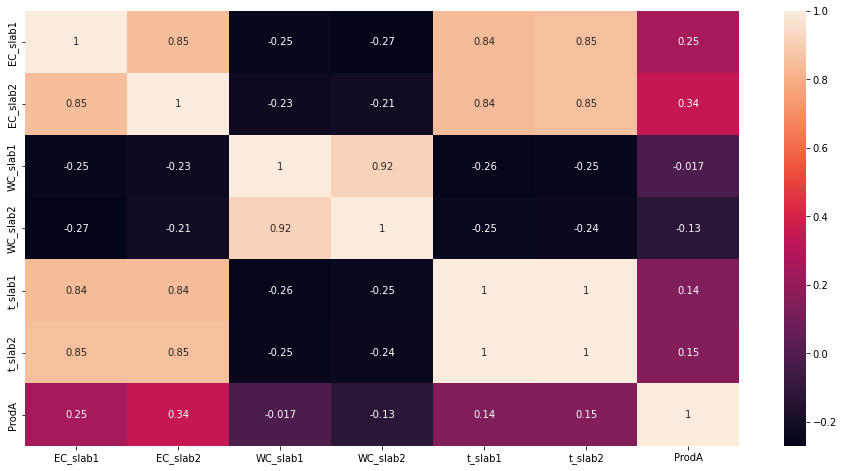

In [43]:
# Getting correlations of greenhouse data set with ProdA
plt.figure(figsize=(16,8))
sns.heatmap(df2.corr(), annot=True)

In [44]:
df2.corr()["ProdA"].sort_values()

WC_slab2   -0.129878
WC_slab1   -0.017092
t_slab1     0.140834
t_slab2     0.151599
EC_slab1    0.253762
EC_slab2    0.343728
ProdA       1.000000
Name: ProdA, dtype: float64

In [ ]:
#In this case, not much relation with ProdA, the whole dataset could be dropped or not included into the final dataset.
df2.drop(columns="ProdA", inplace=True)

4. Resources

In [45]:
resources = pd.read_csv("Resources.csv")
resources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %Time      166 non-null    int64  
 1   Heat_cons  166 non-null    float64
 2   ElecHigh   166 non-null    float64
 3   ElecLow    166 non-null    float64
 4   CO2_cons   166 non-null    float64
 5   Irr        166 non-null    float64
 6   Drain      166 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 9.2 KB


In [49]:
resources.rename(columns={"%Time ": "Time"}, inplace=True)
resources['Time'] = pd.to_datetime(resources['Time'], unit='D', origin='1899-12-30')
resources.set_index("Time", inplace=True)

In [50]:
df3 = resources.loc[filt,:]
df3

,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
Time,,,,,,
2020-02-24,1.2840,1.5,0.872667,0.038455,3.64,1.20
2020-02-25,1.2450,0.8,0.940667,0.051075,3.38,0.67
2020-02-26,1.6953,1.5,0.940667,0.043725,4.42,1.46
2020-02-27,1.9527,1.5,0.940667,0.038088,4.68,1.74
2020-02-28,1.6254,1.5,0.940667,0.046397,4.68,2.01
...,...,...,...,...,...,...
2020-05-25,0.4404,0.0,0.000000,0.017107,3.12,1.22
2020-05-26,0.4143,0.0,0.000000,0.014336,2.86,0.08
2020-05-27,0.4182,0.0,0.000000,0.017712,2.86,0.08


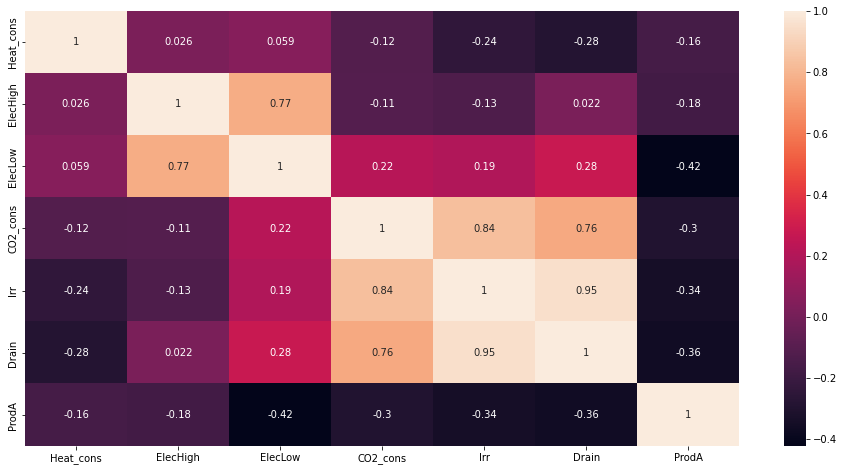

In [51]:
df3["ProdA"] = df0.ProdA

# Getting correlations of greenhouse data set with ProdA
plt.figure(figsize=(16,8))
sns.heatmap(df3.corr(), annot=True)

In [52]:
df3.corr()["ProdA"].sort_values()

ElecLow     -0.421855
Drain       -0.358411
Irr         -0.340665
CO2_cons    -0.296989
ElecHigh    -0.176375
Heat_cons   -0.162957
ProdA        1.000000
Name: ProdA, dtype: float64

In [53]:
df3.drop(columns="ProdA", inplace=True)

5. Weather

In [54]:
weather = pd.read_csv("Weather.csv")
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      47809 non-null  float64
 1   AbsHumOut  47738 non-null  float64
 2   Iglob      47738 non-null  float64
 3   PARout     47738 non-null  float64
 4   Pyrgeo     47738 non-null  float64
 5   RadSum     47738 non-null  float64
 6   Rain       47738 non-null  float64
 7   Rhout      47738 non-null  float64
 8   Tout       47738 non-null  float64
 9   Winddir    47738 non-null  float64
 10  Windsp     47738 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


In [55]:
weather.rename(columns={"%time": "Time"}, inplace=True)
weather['Time'] = pd.to_datetime(weather['Time'], unit='D', origin='1899-12-30')

In [56]:
df4 = weather.groupby(pd.Grouper(key='Time', axis=0, freq='D')).mean()

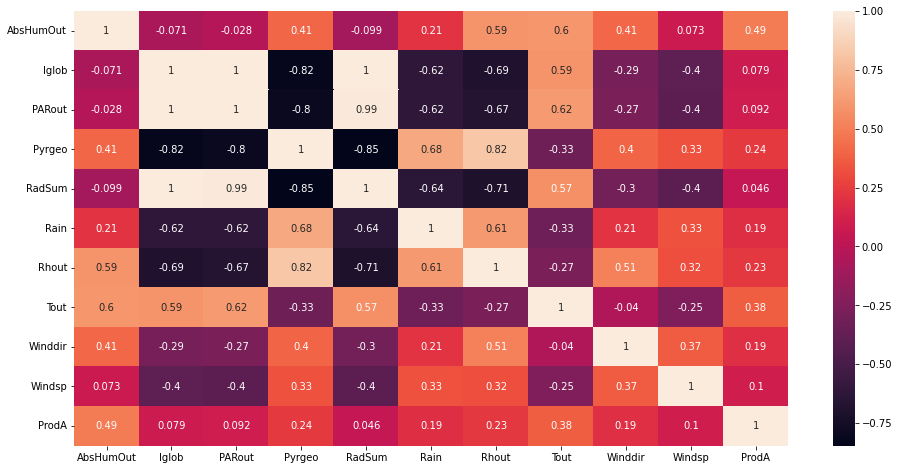

In [57]:
df4 = df4.loc[filt,:]
df4["ProdA"] = df0.ProdA

# Getting correlations of greenhouse data set with ProdA
plt.figure(figsize=(16,8))
sns.heatmap(df4.corr(), annot=True)

In [58]:
df4.corr()["ProdA"].sort_values()

RadSum       0.045700
Iglob        0.079159
PARout       0.091509
Windsp       0.099692
Rain         0.188237
Winddir      0.194661
Rhout        0.229169
Pyrgeo       0.235513
Tout         0.378717
AbsHumOut    0.489709
ProdA        1.000000
Name: ProdA, dtype: float64

In [59]:
df4.drop(columns="ProdA", inplace=True)

Merging the datasets

In [60]:
df = pd.concat([df1, df2, df3, df4], axis=1)
df

,AssimLight,BlackScr,CO2air,Cum_irr,EC_drain_PC,EnScr,HumDef,PipeGrow,PipeLow,Rhair,...,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
Time,,,,,,,,,,,,,,,,,,,,,
2020-02-24,73.263889,32.430556,653.892361,2.351389,5.223264,63.017361,1.821875,33.624653,7.783681,90.192014,...,7.329040,15.510417,33.736111,-17.868056,65.013889,0.197917,87.445139,7.902083,32.111111,8.381250
2020-02-25,63.306452,39.217742,649.564516,2.215726,5.250000,38.991935,2.042742,32.668548,9.173790,89.322984,...,5.949068,57.278226,122.197581,-60.306452,299.691532,0.137097,77.033065,6.922581,56.387097,9.260081
2020-02-26,75.694444,32.951389,652.690972,2.722917,5.230208,42.177083,2.064583,33.630903,12.391319,88.862847,...,5.438749,50.836806,100.934028,-28.355903,207.937500,0.322917,86.280382,3.909549,56.850694,6.349132
2020-02-27,75.694444,41.097222,682.909722,2.916667,5.264236,53.298611,1.756944,34.175347,14.766667,90.508333,...,5.324932,25.170139,51.104167,-25.468750,98.579861,0.357639,85.602431,3.706944,33.784722,3.493403
2020-02-28,75.694444,32.357639,662.406250,2.923958,5.160069,39.347222,2.090625,34.512500,10.344444,89.300694,...,5.687126,52.048611,104.788194,-38.333333,227.062500,0.215278,83.179861,5.065625,33.222222,5.469097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25,0.000000,35.027778,518.034722,1.853125,8.109028,89.263889,7.059028,19.638542,0.534722,75.748958,...,9.007958,340.274306,688.909722,-79.788194,1252.656250,0.006944,68.341319,15.562847,53.614583,3.139583
2020-05-26,0.000000,34.565972,522.934028,1.723264,7.717708,88.659722,6.342708,17.448264,0.931250,78.068056,...,8.835923,321.593750,642.562500,-84.270833,1175.694444,0.000000,64.678819,16.584028,34.666667,1.643750
2020-05-27,0.000000,34.871528,507.628472,1.728472,8.238542,89.107639,7.121875,18.987153,1.467014,75.506250,...,8.692125,351.562500,699.618056,-85.079861,1238.833333,0.000000,66.719444,15.438889,28.072917,2.584722


In [61]:
df.columns

Index(['AssimLight', 'BlackScr', 'CO2air', 'Cum_irr', 'EC_drain_PC', 'EnScr',
       'HumDef', 'PipeGrow', 'PipeLow', 'Rhair', 'Tair', 'Tot_PAR',
       'Tot_PAR_Lamps', 'VentLee', 'Ventwind', 'co2_dos', 'pH_drain_PC',
       'water_sup', 'EC_slab1', 'EC_slab2', 'WC_slab1', 'WC_slab2', 't_slab1',
       't_slab2', 'ProdA', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons',
       'Irr', 'Drain', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum',
       'Rain', 'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [62]:
df["ProdA"] = df0.ProdA

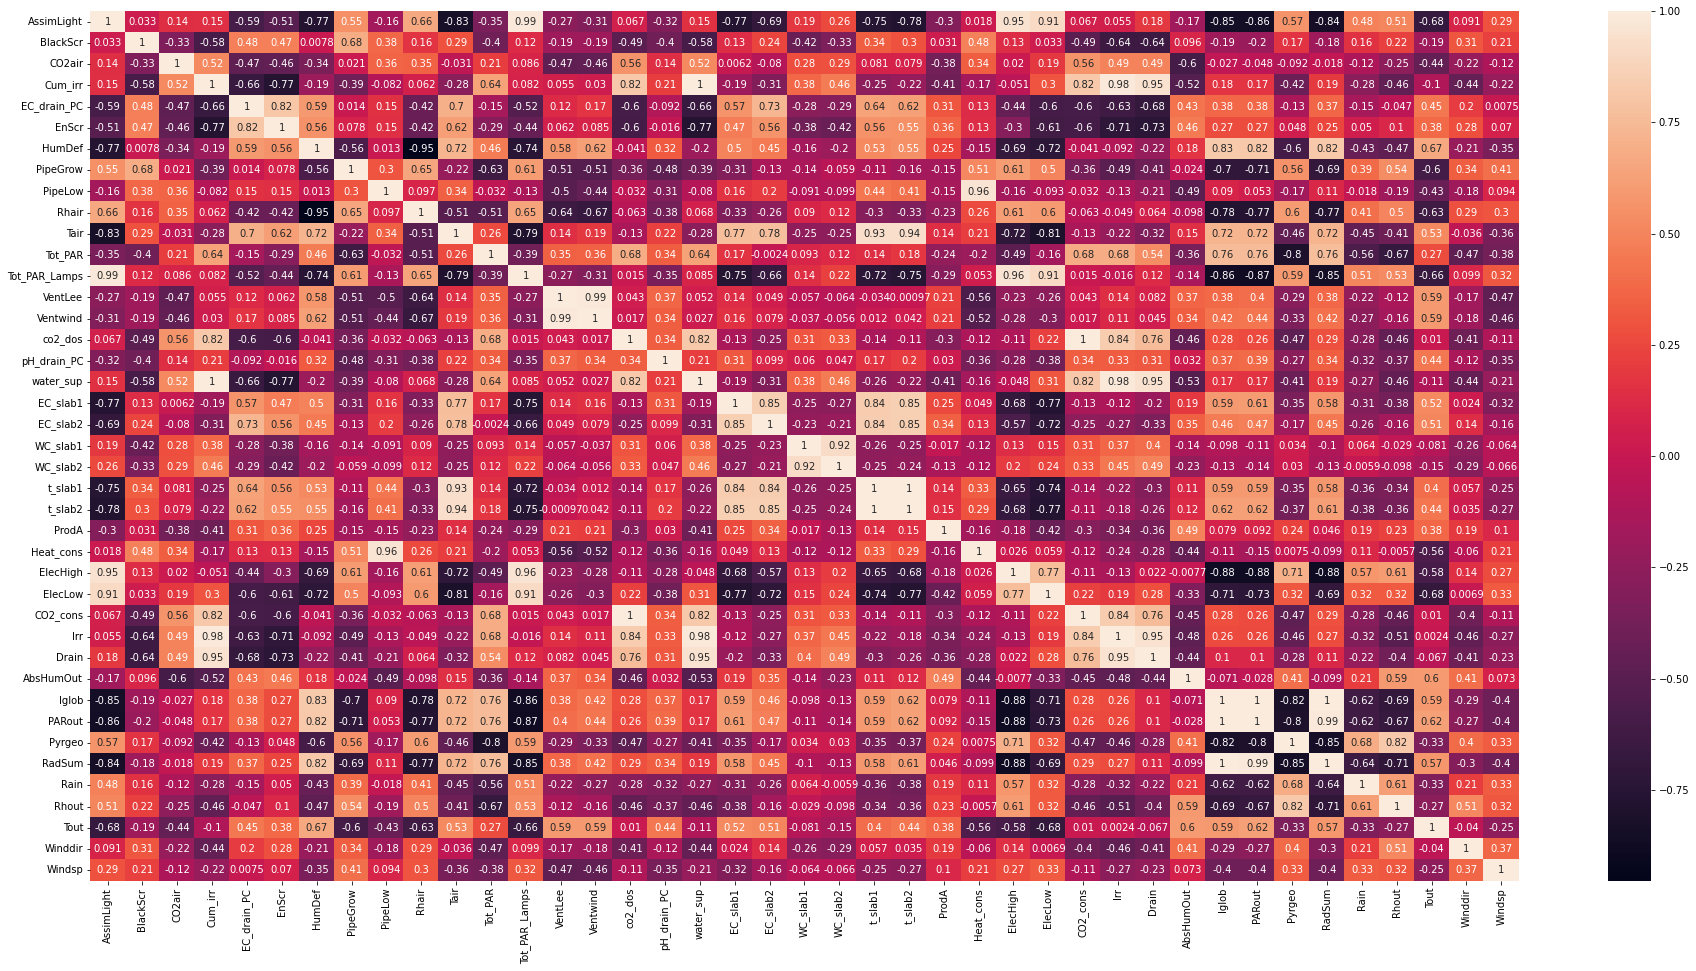

In [63]:
plt.figure(figsize=(32,16))
sns.heatmap(df.corr(), annot=True)

In [64]:
df.corr()["ProdA"].sort_values()

ElecLow         -0.421855
Cum_irr         -0.410761
water_sup       -0.409807
CO2air          -0.377983
Drain           -0.358411
Irr             -0.340665
AssimLight      -0.304732
co2_dos         -0.297084
CO2_cons        -0.296989
Tot_PAR_Lamps   -0.289079
Tot_PAR         -0.235038
Rhair           -0.231315
ElecHigh        -0.176375
Heat_cons       -0.162957
PipeGrow        -0.153128
PipeLow         -0.150654
WC_slab2        -0.129878
WC_slab1        -0.017092
pH_drain_PC      0.030083
BlackScr         0.031060
RadSum           0.045700
Iglob            0.079159
PARout           0.091509
Windsp           0.099692
t_slab1          0.140834
Tair             0.141086
t_slab2          0.151599
Rain             0.188237
Winddir          0.194661
Ventwind         0.212890
VentLee          0.214608
Rhout            0.229169
Pyrgeo           0.235513
HumDef           0.246748
EC_slab1         0.253762
EC_drain_PC      0.307609
EC_slab2         0.343728
EnScr            0.361748
Tout        

This dataset can be used to build a predictive model for the ProdA. It's important to mention that it sould be a good idea usa PCA models to reduce the dimensionality of the dataset and help the neural network

The other datasets ar not used, mainly to the fact that they give information about the product, not the greenhouse variables, so a regression of them is not necessary. Also the number of entries are reduced